## Project Summary

### Project Description
The Iris Flower Classification project aims to develop a machine learning model that classifies iris flowers into their respective species based on specific measurements. The three species of iris flowers—setosa, versicolor, and virginica—each possess unique characteristics that can be identified through various measurements.

### Objective
The primary objective of this project is to utilize machine learning techniques to create a classification model capable of accurately identifying the species of iris flowers based on their measurements. This model seeks to automate the classification process, providing a practical solution for identifying different iris species.

### Key Project Details
1. Species: The project focuses on three species of iris flowers: setosa, versicolor, and virginica.
2. Distinguishing Features: These species can be differentiated based on measurements including:
    **Sepal length**
    **Sepal width**
    **Petal length**
    **Petal width**
3. Training the Model: The project involves training a machine learning model using a dataset that contains measurements of iris flowers along with their corresponding species.
4. Classification: The trained model will classify new iris flowers into one of the three species based on their measurements.


## Problem Statement
The iris flower, scientifically classified under the genus Iris, encompasses three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species display variations in their physical characteristics, particularly in the measurements of sepal length, sepal width, petal length, and petal width.

### Objective
The goal of this project is to develop a machine learning model that can learn from the measurements of iris flowers and accurately classify them into their respective species. The primary aim is to automate the classification process by leveraging the distinct characteristics associated with each iris species.

### Project Details
1. Iris Species: The dataset comprises iris flowers from the three species: setosa, versicolor, and virginica.
2. Key Measurements: The critical characteristics utilized for classification include:
**Sepal length**
**Sepal width**
**Petal length**
**Petal width**
3. Machine Learning Model: This project involves creating and training a machine learning model that accurately classifies iris flowers based on their measurements.

### Significance
The significance of this project lies in its potential to streamline and automate the classification of iris species. This capability can have broader applications in fields such as botany, horticulture, and environmental monitoring, enhancing our understanding and management of plant diversity.

## Well, we knew about the problems and objectives. Now, Let's start to 

## 1.know the Data


### Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import Model Selection Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Used for Machine Learning Model Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [11]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Rows and Columns

In [14]:
print("Number of Rows: ", df.shape[0])

print("Number of Columns: ", df.shape[1])



Number of Rows:  150
Number of Columns:  6


### Information

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Check Duplicate Rows

In [17]:
duplicate = df.duplicated().sum()
print(f"Number of Duplicated Rows are {duplicate}")



Number of Duplicated Rows are 0


### Check Missing Values

In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Understanding the Iris Dataset

The **Iris Dataset** is a well-known collection of measurements that provides valuable insights into different species of iris flowers. Here are the key details regarding the dataset:

## Dataset Composition

`Measurements`: The Dataset includes measurements of : 
- Sepal length (in centimeters)
- Sepal width (in centimeters)
- Petal length (in centimeters)
- Petal width (in centimeters)

`Rows and Columns:`
- The dataset contains **150 rows**, each representing a different iris flower.
- There are **6 columns** in total, which include the four measurement columns mentioned above, along with two additional columns for species identification.

## Data Quality
- `Duplicates`: There are **no duplicate values** in the dataset, ensuring that each entry is unique.
- `Null Values`: The dataset is free from **nul values**, indicating that all measurements are complete and available for analysis.

This structured and clean dataset serves as an excellent foundation for developing machine learning models aimed at classifying iris species based on their physical characteristics.


## 2. Understanding the Variables

In [19]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
# dataset describe (all columns included)
df.describe(include = 'all').round(2)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable.

In [22]:
for i in df.columns.tolist():
    print("Number of unique values in", i,"is:", df[i].nunique())

Number of unique values in Id is: 150
Number of unique values in SepalLengthCm is: 35
Number of unique values in SepalWidthCm is: 23
Number of unique values in PetalLengthCm is: 43
Number of unique values in PetalWidthCm is: 22
Number of unique values in Species is: 3


## 3. Data Wrangling

well, we don't need the 1st column se let's drop that


In [23]:
data = df.iloc[:,1:]


In [24]:
# we have new dataset,
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 4. Data Visualization, Storytelling, and Chart Experimentation: Exploring Variable Relationships

Gain insights into the connections between different variables.

Chart 1 - Distributed of Numerical Variables

Text(0.5, 1.0, 'Sepal Length Distribution')

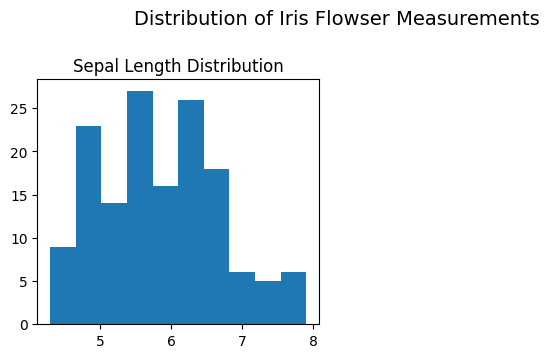

In [26]:
# create a figure with subplots
plt.figure(figsize=(8,7))
plt.suptitle("Distribution of Iris Flowser Measurements", fontsize=14)

# Create a 2*2 grid of subplots
plt.subplot(2,2,1) # subplot 1 (Top-left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')